#### 文本聚类是将文本文档或句子分组的过程，使得同一组中的文本相似度较高，而不同组中的文本相似度较低。以下是主要的文本聚类方法以及它们的基本代码示例：

1. **K-Means聚类**:
   K-Means是一种迭代的聚类方法，其目的是最小化每个文本与其簇中心的距离。

   ``` python
   from sklearn.cluster import KMeans
   from sklearn.feature_extraction.text import TfidfVectorizer

   vectorizer = TfidfVectorizer()
   X = vectorizer.fit_transform(texts)

   kmeans = KMeans(n_clusters=3)
   labels = kmeans.fit_predict(X)
   ```

2. **层次聚类**:
   如前所述，层次聚类从每个文本为单独的簇开始，并逐渐合并簇。

   ``` python
   from sklearn.cluster import AgglomerativeClustering

   cluster = AgglomerativeClustering(n_clusters=3)
   labels = cluster.fit_predict(X.toarray())
   ```

3. **DBSCAN**:
   DBSCAN是一种基于密度的聚类方法，它可以识别并忽略噪声，并且不需要预先指定簇的数量。

   ``` python
   from sklearn.cluster import DBSCAN

   dbscan = DBSCAN(eps=0.5, min_samples=5)
   labels = dbscan.fit_predict(X.toarray())
   ```

4. **主题模型(LDA)**:
   虽然LDA主要用于主题建模，但它也可以用于聚类。每个文本被分配给一个或多个主题。

   ``` python
   from sklearn.decomposition import LatentDirichletAllocation

   lda = LatentDirichletAllocation(n_components=3)
   lda.fit(X)
   topic_distribution = lda.transform(X)
   labels = topic_distribution.argmax(axis=1)
   ```

5. **自组织映射 (SOM)**:
   SOM是一种神经网络方法，用于将高维数据映射到低维空间。尽管它不是传统的聚类方法，但它可以用于此目的。

   ``` python
   # 使用SOM库如SOMPY或MiniSom
   from minisom import MiniSom

   som = MiniSom(3, 3, X.shape[1])  # 3x3 grid
   som.train(X.toarray(), 1000)  # 1000 iterations
   labels = np.array([[som.winner(x) for x in X.toarray()]])
   ```



### 文本的层次聚类示例

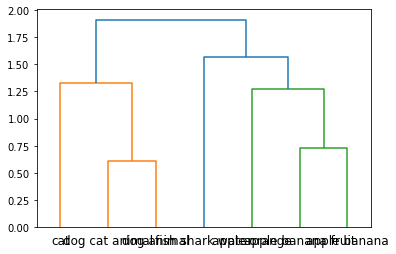

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 示例文本数据
texts = [
    "apple banana fruit",
    "apple orange",
    "apple banana",
    "dog cat animal",
    "dog animal",
    "cat",
    "fish shark water"
]

# 使用TF-IDF向量化器将文本转化为数值特征
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

# 使用层次聚类
cluster = AgglomerativeClustering(n_clusters=3)
model = cluster.fit(X.toarray())

# 使用Scipy创建层次聚类树状图
linkage_matrix = linkage(X.toarray(), 'ward')
dendrogram(linkage_matrix, labels=texts)
plt.show()


In [5]:
# 获取每个文本的簇标签
labels = model.labels_

labels_dict = {text: label for text, label in zip(texts, labels)}
labels_dict

{'apple banana fruit': 1,
 'apple orange': 1,
 'apple banana': 1,
 'dog cat animal': 0,
 'dog animal': 0,
 'cat': 0,
 'fish shark water': 2}

###
一些常见的技巧和方法可以帮助我们估计一个好的聚类数：

1.肘部法则（Elbow Method）：这种方法涉及到运行聚类算法多次，每次使用不同的簇数，并计算每次的成本（例如，每个点到其簇中心的平均距离）。当簇数增加时，成本会减少，但是减少的速度会在某个点变得非常慢。这个点就是“肘部”，并可以作为一个好的簇数的指标。

2.轮廓系数（Silhouette Score）：这是一个介于-1和1之间的指标，用于衡量簇内相似性和簇间不同性。一个高的轮廓系数表示簇是正确和合适地分离的。你可以计算不同簇数的轮廓系数，并选择最大值。

3.达夫-博文指数（Davies-Bouldin Index）：这个指标基于每个簇内的平均距离和簇之间的距离。较低的Davies-Bouldin Index值表示更好的模型。

4.层次聚类树状图：对于层次聚类，你可以观察树状图并决定在哪个级别切割是最有意义的。

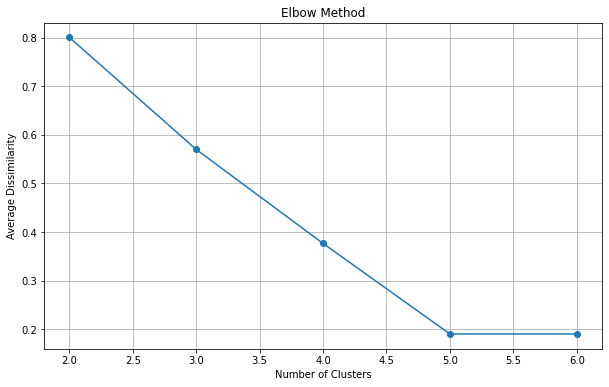

In [8]:
###肘部法则法

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# 使用Ward方法计算层次聚类的链接矩阵
linked = linkage(X.toarray(), 'ward')

# 定义簇数的范围
range_n_clusters = list(range(2, len(texts)))

# 为不同的簇数计算聚类成本
costs = []
for k in range_n_clusters:
    labels = fcluster(linked, k, criterion='maxclust')
    cost = np.mean([np.mean([np.linalg.norm(X[i].toarray() - X[j].toarray()) 
                             for j in range(len(texts)) if labels[j] == label]) 
                    for i, label in enumerate(labels)])
    costs.append(cost)



# 绘制肘部图
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, costs, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Dissimilarity")
plt.grid(True)
plt.show()


In [6]:
#####轮廓系数法
from sklearn.metrics import silhouette_score

# 定义簇数的范围
range_n_clusters = list(range(2, len(texts)))

silhouette_scores = []

# 对于每个簇数，计算轮廓系数
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X.toarray())
    score = silhouette_score(X.toarray(), preds)
    silhouette_scores.append(score)

# 找到轮廓系数最大的簇数
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

optimal_clusters, silhouette_scores


(3,
 [0.21236611672906805,
  0.25272690066073555,
  0.25146926419585636,
  0.23734692969408736,
  0.13038691240085382])

In [9]:
####达夫-博文指数

from sklearn.metrics import davies_bouldin_score

dbi_scores = []

# 对于每个簇数，计算DBI
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X.toarray())
    score = davies_bouldin_score(X.toarray(), preds)
    dbi_scores.append(score)

# 找到DBI最小的簇数
optimal_clusters_dbi = range_n_clusters[dbi_scores.index(min(dbi_scores))]

optimal_clusters_dbi, dbi_scores


(6,
 [1.25292819891373,
  0.8211482446071079,
  0.5874225007758416,
  0.3713337335964332,
  0.23370474410282793])